# SCC0270 - Redes Neurais e Aprendizado Profundo
### Aula 6 - Prática (Support Vector Machine e Multilayer Perceptron)
**Daniel Penna Chaves Bertazzo - 10349561**

### 1) Análise dos *datasets* e escolha da métrica de avaliação
Para começar, faremos uma análise dos *datasets* para decidir qual métrica utilizaremos para realizar a avaliação dos modelos.

In [1]:
import pandas as pd

In [2]:
# Leitura dos datasets
df1 = pd.read_csv("dados1.csv")
df2 = pd.read_csv("dados2.csv")

# Separa os labels (seleciona apenas a ultima coluna)
y1 = df1.iloc[:, -1]
y2 = df2.iloc[:, -1]

Primeiramente, checaremos quantos *labels* (classes) existem em cada *dataset:*

In [3]:
print("Labels do primeiro dataset:")
print(y1.unique())

print("\n============================================================================\n")

print("Labels do segundo dataset:")
print(y2.unique())

Labels do primeiro dataset:
[1 2]


Labels do segundo dataset:
[1 2]


<br><br>
Temos duas classes em cada conjunto de dados: 1 e 2.

Agora, vamos ver quantas *features* cada conjunto de dados possui:

In [4]:
print("Formato do primeiro dataset:")
print(df1.shape)

print("\n============================================================================\n")

print("Formato do segundo dataset:")
print(df2.shape)

Formato do primeiro dataset:
(800, 3)


Formato do segundo dataset:
(800, 3)


<br><br>
É possível perceber que ambos os conjuntos possuem 800 linhas (exemplos) e 3 colunas, sendo que a última representa as classes de cada exemplo. Logo, temos $3-1=2$ *features*. Com isso, podemos realizar um *scatter plot* dos *datasets*, para visualizarmos como os exemplos se separam no espaço.

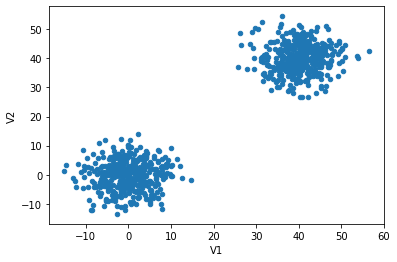

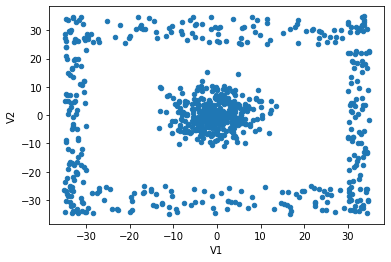

In [5]:
df1.plot.scatter(x='V1', y='V2')
df2.plot.scatter(x='V1', y='V2')

Perceba que no primeiro conjunto as classes são linearmente separáveis e no segundo não.


Em seguida, verificamos quantos exemplos de cada classe existem em cada conjunto de dados:

In [6]:
print("Quantidade de exemplos de cada label no dataset 1:")
print(y1.value_counts())

print("\n============================================================================\n")

print("Quantidade de exemplos de cada label no dataset 1:")
print(y2.value_counts())

Quantidade de exemplos de cada label no dataset 1:
2    400
1    400
Name: V3, dtype: int64


Quantidade de exemplos de cada label no dataset 1:
2    400
1    400
Name: V3, dtype: int64


<br><br>
É possível perceber que ambos os *datasets* possuem metade dos exemplos de cada *label*, logo são muito bem distribuídos em relação às classes existentes. Com isso, conclui-se que uma métrica válida para essa situação é a **acurácia**.

### 2) Separação dos dados
Vamos separar os *datasets* em *features* e *labels*, e também em conjunto de treino e de validação.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# ..:: Primeiro dataset ("dados1.csv") ::..

# Divide em treino e teste (validacao)
train_set1, test_set1 = train_test_split(df1, test_size=0.3)

# Divide em feature e label
X_train1 = train_set1.iloc[:, :-1]
y_train1 = train_set1.iloc[:,  -1]
X_test1  = test_set1.iloc[:, :-1]
y_test1  = test_set1.iloc[:,  -1]

In [9]:
# ..:: Segundo dataset ("dados2.csv") ::..

# Divide em treino e teste (validacao)
train_set2, test_set2 = train_test_split(df2, test_size=0.3)

# Divide em feature e label
X_train2 = train_set2.iloc[:, :-1]
y_train2 = train_set2.iloc[:,  -1]
X_test2  = test_set2.iloc[:, :-1]
y_test2  = test_set2.iloc[:,  -1]

### 3) Criando os modelos

### 3.1) MLP

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
# Instancia o modelo
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, activation='logistic', learning_rate_init=0.1)

In [12]:
print(mlp)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


### 3.2) SVM

In [13]:
from sklearn.svm import SVC

In [14]:
# Instancia o modelo
svm = SVC()

In [15]:
print(svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 4) Treinamento dos modelos e realização das predições

### 4.1) MLP

In [16]:
# ..:: Primeiro dataset ("dados1.csv") ::..

# Realiza o treinamento
mlp.fit(X_train1, y_train1)

# Faz as predicoes
y_pred1_mlp = mlp.predict(X_test1)

In [17]:
# ..:: Segundo dataset ("dados2.csv") ::..

# Realiza o treinamento
mlp.fit(X_train2, y_train2)

# Faz as predicoes
y_pred2_mlp = mlp.predict(X_test2)

### 4.2) SVM

In [18]:
# Primeiro dataset ("dados1.csv")

# Realiza o treinamento
svm.fit(X_train1, y_train1)

# Faz as predicoes
y_pred1_svm = svm.predict(X_test1)

In [19]:
# Segundo dataset ("dados2.csv")

# Realiza o treinamento
svm.fit(X_train2, y_train2)

# Faz as predicoes
y_pred2_svm = svm.predict(X_test2)

### 5) Avaliando os modelos

### 5.1) MLP

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Acuracia relacionada ao primeiro dataset ("dados1.csv")
acc1_mlp = accuracy_score(y_test1, y_pred1_mlp)

# Acuracia relacionada ao segundo dataset ("dados2.csv")
acc2_mlp = accuracy_score(y_test2, y_pred2_mlp)

In [22]:
print("Acuracia da MLP no primeiro dataset:")
print(acc1_mlp)

print("\n============================================================================\n")

print("Acuracia da MLP no segundo dataset:")
print(acc2_mlp)

Acuracia da MLP no primeiro dataset:
1.0


Acuracia da MLP no segundo dataset:
1.0


### 5.2) SVM

In [23]:
# Acuracia relacionada ao primeiro dataset ("dados1.csv")
acc1_svm = accuracy_score(y_test1, y_pred1_svm)

# Acuracia relacionada ao segundo dataset ("dados2.csv")
acc2_svm = accuracy_score(y_test2, y_pred2_svm)

In [24]:
print("Acuracia da SVM no primeiro dataset:")
print(acc1_svm)

print("\n============================================================================\n")

print("Acuracia da SVM no segundo dataset:")
print(acc2_svm)

Acuracia da SVM no primeiro dataset:
1.0


Acuracia da SVM no segundo dataset:
1.0


### 6) Conclusão

No final, obtivemos ótimos resultados em ambos os modelos, mesmo sabendo que o *dataset* `dados2.csv` possui exemplos pertencentes a classes **não linearmente separáveis**. Sabemos que uma rede neural (no caso, uma Multilayer Perceptron) é capaz de realizar tal separação. Porém uma SVM, a princípio, não é, e mesmo assim os resultados foram muito bons.
<br>
Isso ocorre pois a função `SVC` da biblioteca `sklearn` utiliza um *kernel* para mapear o conjunto de dados de entrada para outro espaço (chamado *feature space*), o qual possui mais dimensões, possibilitando o treinamento e subsequente divisão bem-sucedida dos dados pela SVM linear.